<a href="https://colab.research.google.com/github/gomlfx/ApiaryFund/blob/master/AGC27_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#License: GPL 
#Creator: Mike Smith https://github.com/gomlfx 
#designed for colab/kaggle/Jupyter

In [3]:
#!pip install autogluon
#!pip install --upgrade mxnet

In [4]:
import pandas as pd
import numpy as np
#import matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline
#import normalization
from sklearn import preprocessing

#autogluon
from autogluon.tabular import TabularDataset, TabularPredictor

In [5]:
#metatrader5 file format
df=pd.read_csv('/content/GBPAUD_Daily_200708210000_202205060000.csv')

In [6]:
print(df.head())
print(df.tail())
df.info()

  <DATE>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
0  2007.08.21\t2.47510\t2.48010\t2.47100\t2.47810...                
1  2007.08.22\t2.47820\t2.48490\t2.46210\t2.46610...                
2  2007.08.23\t2.46600\t2.46910\t2.44050\t2.44660...                
3  2007.08.24\t2.44610\t2.45680\t2.43270\t2.43500...                
4  2007.08.27\t2.43210\t2.43730\t2.42060\t2.43360...                
     <DATE>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
3795  2022.05.02\t1.77694\t1.78577\t1.77031\t1.77198...                
3796  2022.05.03\t1.77119\t1.77330\t1.75453\t1.76114...                
3797  2022.05.04\t1.76031\t1.76202\t1.73553\t1.73974...                
3798  2022.05.05\t1.73837\t1.74321\t1.71787\t1.73793...                
3799  2022.05.06\t1.73810\t1.74504\t1.73218\t1.74463...                
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 1 columns):
 #   Column                                     

In [7]:
df.columns=['header']

In [8]:
df = df.header.str.split('\t', expand=True)

In [9]:
df

,0,1,2,3,4,5,6,7
0,2007.08.21,2.47510,2.48010,2.47100,2.47810,1520,0,100
1,2007.08.22,2.47820,2.48490,2.46210,2.46610,7851,0,100
2,2007.08.23,2.46600,2.46910,2.44050,2.44660,8620,0,100
3,2007.08.24,2.44610,2.45680,2.43270,2.43500,7886,0,100
4,2007.08.27,2.43210,2.43730,2.42060,2.43360,6430,0,100
...,...,...,...,...,...,...,...,...
3795,2022.05.02,1.77694,1.78577,1.77031,1.77198,114909,0,1
3796,2022.05.03,1.77119,1.77330,1.75453,1.76114,127318,0,1
3797,2022.05.04,1.76031,1.76202,1.73553,1.73974,134831,0,1
3798,2022.05.05,1.73837,1.74321,1.71787,1.73793,167536,0,1


In [10]:
df.drop([0,5,6,7], axis=1,inplace=True)
df = df.astype(float, errors = 'raise')

In [11]:
df.rename(columns={1:'p_o',2:'p_h',3:'p_l',4:'p_c'}, inplace=True)

In [12]:
print(df.columns)

Index(['p_o', 'p_h', 'p_l', 'p_c'], dtype='object')


In [13]:
#Features

#130 periods ago
df['p_Open_last_period130'] = df['p_o'].shift(130) 
df['p_High_last_period130'] = df['p_h'].shift(130)
df['p_Low_last_period130'] = df['p_l'].shift(130)
df['p_Close_last_period130'] = df['p_c'].shift(130)
#129 periods ago
df['p_Open_last_period129'] = df['p_o'].shift(129) 
df['p_High_last_period129'] = df['p_h'].shift(129)
df['p_Low_last_period129'] = df['p_l'].shift(129)
df['p_Close_last_period129'] = df['p_c'].shift(129)
#128 periods ago
df['p_Open_last_period128'] = df['p_o'].shift(128) 
df['p_High_last_period128'] = df['p_h'].shift(128)
df['p_Low_last_period128'] = df['p_l'].shift(128)
df['p_Close_last_period128'] = df['p_c'].shift(128)
#127 periods ago
df['p_Open_last_period127'] = df['p_o'].shift(127) 
df['p_High_last_period127'] = df['p_h'].shift(127)
df['p_Low_last_period127'] = df['p_l'].shift(127)
df['p_Close_last_period127'] = df['p_c'].shift(127)
#126 periods ago
df['p_Open_last_period126'] = df['p_o'].shift(126) 
df['p_High_last_period126'] = df['p_h'].shift(126)
df['p_Low_last_period126'] = df['p_l'].shift(126)
df['p_Close_last_period126'] = df['p_c'].shift(126)
#125 periods ago
df['p_Open_last_period125'] = df['p_o'].shift(125) 
df['p_High_last_period125'] = df['p_h'].shift(125)
df['p_Low_last_period125'] = df['p_l'].shift(125)
df['p_Close_last_period125'] = df['p_c'].shift(125)
#124 periods ago
df['p_Open_last_period124'] = df['p_o'].shift(124) 
df['p_High_last_period124'] = df['p_h'].shift(124)
df['p_Low_last_period124'] = df['p_l'].shift(124)
df['p_Close_last_period124'] = df['p_c'].shift(124)
#123 periods ago
df['p_Open_last_period123'] = df['p_o'].shift(123) 
df['p_High_last_period123'] = df['p_h'].shift(123)
df['p_Low_last_period123'] = df['p_l'].shift(123)
df['p_Close_last_period123'] = df['p_c'].shift(123)
#122 periods ago
df['p_Open_last_period122'] = df['p_o'].shift(122) 
df['p_High_last_period122'] = df['p_h'].shift(122)
df['p_Low_last_period122'] = df['p_l'].shift(122)
df['p_Close_last_period122'] = df['p_c'].shift(122)
#121 periods ago
df['p_Open_last_period121'] = df['p_o'].shift(121) 
df['p_High_last_period121'] = df['p_h'].shift(21)
df['p_Low_last_period121'] = df['p_l'].shift(121)
df['p_Close_last_period121'] = df['p_c'].shift(121)
#120 periods ago
df['p_Open_last_period120'] = df['p_o'].shift(120) 
df['p_High_last_period120'] = df['p_h'].shift(120)
df['p_Low_last_period120'] = df['p_l'].shift(120)
df['p_Close_last_period120'] = df['p_c'].shift(120)
#119 periods ago
df['p_Open_last_period119'] = df['p_o'].shift(119) 
df['p_High_last_period119'] = df['p_h'].shift(119)
df['p_Low_last_period119'] = df['p_l'].shift(119)
df['p_Close_last_period119'] = df['p_c'].shift(119)
#118 periods ago
df['p_Open_last_period118'] = df['p_o'].shift(118) 
df['p_High_last_period118'] = df['p_h'].shift(118)
df['p_Low_last_period118'] = df['p_l'].shift(118)
df['p_Close_last_period118'] = df['p_c'].shift(118)
#117 periods ago
df['p_Open_last_period117'] = df['p_o'].shift(117) 
df['p_High_last_period117'] = df['p_h'].shift(117)
df['p_Low_last_period117'] = df['p_l'].shift(117)
df['p_Close_last_period117'] = df['p_c'].shift(117)
#116 periods ago
df['p_Open_last_period116'] = df['p_o'].shift(116) 
df['p_High_last_period116'] = df['p_h'].shift(116)
df['p_Low_last_period116'] = df['p_l'].shift(116)
df['p_Close_last_period116'] = df['p_c'].shift(116)
#115 periods ago
df['p_Open_last_period115'] = df['p_o'].shift(115) 
df['p_High_last_period115'] = df['p_h'].shift(115)
df['p_Low_last_period115'] = df['p_l'].shift(115)
df['p_Close_last_period115'] = df['p_c'].shift(115)
#114 periods ago
df['p_Open_last_period114'] = df['p_o'].shift(114) 
df['p_High_last_period114'] = df['p_h'].shift(114)
df['p_Low_last_period1014'] = df['p_l'].shift(114)
df['p_Close_last_period114'] = df['p_c'].shift(114)
#113 periods ago
df['p_Open_last_period113'] = df['p_o'].shift(113) 
df['p_High_last_period113'] = df['p_h'].shift(113)
df['p_Low_last_period113'] = df['p_l'].shift(113)
df['p_Close_last_period113'] = df['p_c'].shift(113)
#112 periods ago
df['p_Open_last_period112'] = df['p_o'].shift(112) 
df['p_High_last_period112'] = df['p_h'].shift(112)
df['p_Low_last_period112'] = df['p_l'].shift(112)
df['p_Close_last_period112'] = df['p_c'].shift(112)
#111 periods ago
df['p_Open_last_period111'] = df['p_o'].shift(111) 
df['p_High_last_period111'] = df['p_h'].shift(111)
df['p_Low_last_period111'] = df['p_l'].shift(111)
df['p_Close_last_period111'] = df['p_c'].shift(111)
#110 periods ago
df['p_Open_last_period110'] = df['p_o'].shift(110) 
df['p_High_last_period110'] = df['p_h'].shift(110)
df['p_Low_last_period110'] = df['p_l'].shift(110)
df['p_Close_last_period110'] = df['p_c'].shift(110)
#109 periods ago
df['p_Open_last_period109'] = df['p_o'].shift(109) 
df['p_High_last_period109'] = df['p_h'].shift(109)
df['p_Low_last_period109'] = df['p_l'].shift(109)
df['p_Close_last_period109'] = df['p_c'].shift(109)
#108 periods ago
df['p_Open_last_period108'] = df['p_o'].shift(108) 
df['p_High_last_period108'] = df['p_h'].shift(108)
df['p_Low_last_period108'] = df['p_l'].shift(108)
df['p_Close_last_period108'] = df['p_c'].shift(108)
#107 periods ago
df['p_Open_last_period107'] = df['p_o'].shift(107) 
df['p_High_last_period107'] = df['p_h'].shift(107)
df['p_Low_last_period107'] = df['p_l'].shift(107)
df['p_Close_last_period107'] = df['p_c'].shift(107)
#106 periods ago
df['p_Open_last_period106'] = df['p_o'].shift(106) 
df['p_High_last_period106'] = df['p_h'].shift(106)
df['p_Low_last_period106'] = df['p_l'].shift(106)
df['p_Close_last_period106'] = df['p_c'].shift(106)
#105 periods ago
df['p_Open_last_period105'] = df['p_o'].shift(105) 
df['p_High_last_period105'] = df['p_h'].shift(105)
df['p_Low_last_period105'] = df['p_l'].shift(105)
df['p_Close_last_period105'] = df['p_c'].shift(105)
#104 periods ago
df['p_Open_last_period104'] = df['p_o'].shift(104) 
df['p_High_last_period104'] = df['p_h'].shift(104)
df['p_Low_last_period104'] = df['p_l'].shift(104)
df['p_Close_last_period104'] = df['p_c'].shift(104)
#103 periods ago
df['p_Open_last_period103'] = df['p_o'].shift(103) 
df['p_High_last_period103'] = df['p_h'].shift(103)
df['p_Low_last_period103'] = df['p_l'].shift(103)
df['p_Close_last_period103'] = df['p_c'].shift(103)
#102 periods ago
df['p_Open_last_period102'] = df['p_o'].shift(102) 
df['p_High_last_period102'] = df['p_h'].shift(102)
df['p_Low_last_period102'] = df['p_l'].shift(102)
df['p_Close_last_period102'] = df['p_c'].shift(102)
#101 periods ago
df['p_Open_last_period101'] = df['p_o'].shift(101) 
df['p_High_last_period101'] = df['p_h'].shift(101)
df['p_Low_last_period101'] = df['p_l'].shift(101)
df['p_Close_last_period101'] = df['p_c'].shift(101)
#100 periods ago
df['p_Open_last_period100'] = df['p_o'].shift(100) 
df['p_High_last_period100'] = df['p_h'].shift(100)
df['p_Low_last_period100'] = df['p_l'].shift(100)
df['p_Close_last_period100'] = df['p_c'].shift(100)
#99 periods ago
df['p_Open_last_period99'] = df['p_o'].shift(99) 
df['p_High_last_period99'] = df['p_h'].shift(99)
df['p_Low_last_period99'] = df['p_l'].shift(99)
df['p_Close_last_period99'] = df['p_c'].shift(99)
#98 periods ago
df['p_Open_last_period98'] = df['p_o'].shift(98) 
df['p_High_last_period98'] = df['p_h'].shift(98)
df['p_Low_last_period98'] = df['p_l'].shift(98)
df['p_Close_last_period98'] = df['p_c'].shift(98)
#97 periods ago
df['p_Open_last_period97'] = df['p_o'].shift(97) 
df['p_High_last_period97'] = df['p_h'].shift(97)
df['p_Low_last_period97'] = df['p_l'].shift(97)
df['p_Close_last_period97'] = df['p_c'].shift(97)
#96 periods ago
df['p_Open_last_period96'] = df['p_o'].shift(96) 
df['p_High_last_period96'] = df['p_h'].shift(96)
df['p_Low_last_period96'] = df['p_l'].shift(96)
df['p_Close_last_period96'] = df['p_c'].shift(96)
#95 periods ago
df['p_Open_last_period95'] = df['p_o'].shift(95) 
df['p_High_last_period95'] = df['p_h'].shift(95)
df['p_Low_last_period95'] = df['p_l'].shift(95)
df['p_Close_last_period95'] = df['p_c'].shift(95)
#94 periods ago
df['p_Open_last_period94'] = df['p_o'].shift(94) 
df['p_High_last_period94'] = df['p_h'].shift(94)
df['p_Low_last_period94'] = df['p_l'].shift(94)
df['p_Close_last_period94'] = df['p_c'].shift(94)
#93 periods ago
df['p_Open_last_period93'] = df['p_o'].shift(93) 
df['p_High_last_period93'] = df['p_h'].shift(93)
df['p_Low_last_period93'] = df['p_l'].shift(93)
df['p_Close_last_period93'] = df['p_c'].shift(93)
#92 periods ago
df['p_Open_last_period92'] = df['p_o'].shift(92) 
df['p_High_last_period92'] = df['p_h'].shift(92)
df['p_Low_last_period92'] = df['p_l'].shift(92)
df['p_Close_last_period92'] = df['p_c'].shift(92)
#91 periods ago
df['p_Open_last_period91'] = df['p_o'].shift(91) 
df['p_High_last_period91'] = df['p_h'].shift(91)
df['p_Low_last_period91'] = df['p_l'].shift(91)
df['p_Close_last_period91'] = df['p_c'].shift(91)
#90 periods ago
df['p_Open_last_period90'] = df['p_o'].shift(90) 
df['p_High_last_period90'] = df['p_h'].shift(90)
df['p_Low_last_period90'] = df['p_l'].shift(90)
df['p_Close_last_period90'] = df['p_c'].shift(90)
#89 periods ago
df['p_Open_last_period89'] = df['p_o'].shift(89) 
df['p_High_last_period89'] = df['p_h'].shift(89)
df['p_Low_last_period89'] = df['p_l'].shift(89)
df['p_Close_last_period89'] = df['p_c'].shift(89)
#88 periods ago
df['p_Open_last_period88'] = df['p_o'].shift(88) 
df['p_High_last_period88'] = df['p_h'].shift(88)
df['p_Low_last_period88'] = df['p_l'].shift(88)
df['p_Close_last_period88'] = df['p_c'].shift(88)
#87 periods ago
df['p_Open_last_period87'] = df['p_o'].shift(87) 
df['p_High_last_period87'] = df['p_h'].shift(87)
df['p_Low_last_period87'] = df['p_l'].shift(87)
df['p_Close_last_period87'] = df['p_c'].shift(87)
#86 periods ago
df['p_Open_last_period86'] = df['p_o'].shift(86) 
df['p_High_last_period86'] = df['p_h'].shift(86)
df['p_Low_last_period86'] = df['p_l'].shift(86)
df['p_Close_last_period86'] = df['p_c'].shift(86)
#85 periods ago
df['p_Open_last_period85'] = df['p_o'].shift(85) 
df['p_High_last_period85'] = df['p_h'].shift(85)
df['p_Low_last_period85'] = df['p_l'].shift(85)
df['p_Close_last_period85'] = df['p_c'].shift(85)
#84 periods ago
df['p_Open_last_period84'] = df['p_o'].shift(84) 
df['p_High_last_period84'] = df['p_h'].shift(84)
df['p_Low_last_period84'] = df['p_l'].shift(84)
df['p_Close_last_period84'] = df['p_c'].shift(84)
#83 periods ago
df['p_Open_last_period83'] = df['p_o'].shift(83) 
df['p_High_last_period83'] = df['p_h'].shift(83)
df['p_Low_last_period83'] = df['p_l'].shift(83)
df['p_Close_last_period83'] = df['p_c'].shift(83)
#82 periods ago
df['p_Open_last_period82'] = df['p_o'].shift(82) 
df['p_High_last_period82'] = df['p_h'].shift(82)
df['p_Low_last_period82'] = df['p_l'].shift(82)
df['p_Close_last_period82'] = df['p_c'].shift(82)
#81 periods ago
df['p_Open_last_period81'] = df['p_o'].shift(81) 
df['p_High_last_period81'] = df['p_h'].shift(81)
df['p_Low_last_period81'] = df['p_l'].shift(81)
df['p_Close_last_period81'] = df['p_c'].shift(81)
#80 periods ago
df['p_Open_last_period80'] = df['p_o'].shift(80) 
df['p_High_last_period80'] = df['p_h'].shift(80)
df['p_Low_last_period80'] = df['p_l'].shift(80)
df['p_Close_last_period80'] = df['p_c'].shift(80)
#79 periods ago
df['p_Open_last_period79'] = df['p_o'].shift(79) 
df['p_High_last_period79'] = df['p_h'].shift(79)
df['p_Low_last_period79'] = df['p_l'].shift(79)
df['p_Close_last_period79'] = df['p_c'].shift(79)
#78 periods ago
df['p_Open_last_period78'] = df['p_o'].shift(78) 
df['p_High_last_period78'] = df['p_h'].shift(78)
df['p_Low_last_period78'] = df['p_l'].shift(78)
df['p_Close_last_period78'] = df['p_c'].shift(78)
#77 periods ago
df['p_Open_last_period77'] = df['p_o'].shift(77) 
df['p_High_last_period77'] = df['p_h'].shift(77)
df['p_Low_last_period77'] = df['p_l'].shift(77)
df['p_Close_last_period77'] = df['p_c'].shift(77)
#76 periods ago
df['p_Open_last_period76'] = df['p_o'].shift(76) 
df['p_High_last_period76'] = df['p_h'].shift(76)
df['p_Low_last_period76'] = df['p_l'].shift(76)
df['p_Close_last_period76'] = df['p_c'].shift(76)
#75 periods ago
df['p_Open_last_period75'] = df['p_o'].shift(75) 
df['p_High_last_period75'] = df['p_h'].shift(75)
df['p_Low_last_period75'] = df['p_l'].shift(75)
df['p_Close_last_period75'] = df['p_c'].shift(75)
#74 periods ago
df['p_Open_last_period74'] = df['p_o'].shift(74) 
df['p_High_last_period74'] = df['p_h'].shift(74)
df['p_Low_last_period74'] = df['p_l'].shift(74)
df['p_Close_last_period74'] = df['p_c'].shift(74)
#73 periods ago
df['p_Open_last_period73'] = df['p_o'].shift(73) 
df['p_High_last_period73'] = df['p_h'].shift(73)
df['p_Low_last_period73'] = df['p_l'].shift(73)
df['p_Close_last_period73'] = df['p_c'].shift(73)
#72 periods ago
df['p_Open_last_period72'] = df['p_o'].shift(72) 
df['p_High_last_period72'] = df['p_h'].shift(72)
df['p_Low_last_period72'] = df['p_l'].shift(72)
df['p_Close_last_period72'] = df['p_c'].shift(72)
#71 periods ago
df['p_Open_last_period71'] = df['p_o'].shift(71) 
df['p_High_last_period71'] = df['p_h'].shift(71)
df['p_Low_last_period71'] = df['p_l'].shift(71)
df['p_Close_last_period71'] = df['p_c'].shift(71)
#70 periods ago
df['p_Open_last_period70'] = df['p_o'].shift(70) 
df['p_High_last_period70'] = df['p_h'].shift(70)
df['p_Low_last_period70'] = df['p_l'].shift(70)
df['p_Close_last_period70'] = df['p_c'].shift(70)
#69 periods ago
df['p_Open_last_period69'] = df['p_o'].shift(69) 
df['p_High_last_period69'] = df['p_h'].shift(69)
df['p_Low_last_period69'] = df['p_l'].shift(69)
df['p_Close_last_period69'] = df['p_c'].shift(69)
#68 periods ago
df['p_Open_last_period68'] = df['p_o'].shift(68) 
df['p_High_last_period68'] = df['p_h'].shift(68)
df['p_Low_last_period68'] = df['p_l'].shift(68)
df['p_Close_last_period68'] = df['p_c'].shift(68)
#67 periods ago
df['p_Open_last_period67'] = df['p_o'].shift(67) 
df['p_High_last_period67'] = df['p_h'].shift(67)
df['p_Low_last_period67'] = df['p_l'].shift(67)
df['p_Close_last_period67'] = df['p_c'].shift(67)
#66 periods ago
df['p_Open_last_period66'] = df['p_o'].shift(66) 
df['p_High_last_period66'] = df['p_h'].shift(66)
df['p_Low_last_period66'] = df['p_l'].shift(66)
df['p_Close_last_period66'] = df['p_c'].shift(66)
#65 periods ago
df['p_Open_last_period65'] = df['p_o'].shift(65) 
df['p_High_last_period65'] = df['p_h'].shift(65)
df['p_Low_last_period65'] = df['p_l'].shift(65)
df['p_Close_last_period65'] = df['p_c'].shift(65)
#64 periods ago
df['p_Open_last_period64'] = df['p_o'].shift(64) 
df['p_High_last_period64'] = df['p_h'].shift(64)
df['p_Low_last_period64'] = df['p_l'].shift(64)
df['p_Close_last_period64'] = df['p_c'].shift(64)
#63 periods ago
df['p_Open_last_period63'] = df['p_o'].shift(63) 
df['p_High_last_period63'] = df['p_h'].shift(63)
df['p_Low_last_period63'] = df['p_l'].shift(63)
df['p_Close_last_period63'] = df['p_c'].shift(63)
#62 periods ago
df['p_Open_last_period62'] = df['p_o'].shift(62) 
df['p_High_last_period62'] = df['p_h'].shift(62)
df['p_Low_last_period62'] = df['p_l'].shift(62)
df['p_Close_last_period62'] = df['p_c'].shift(62)
#61 periods ago
df['p_Open_last_period61'] = df['p_o'].shift(61) 
df['p_High_last_period61'] = df['p_h'].shift(61)
df['p_Low_last_period61'] = df['p_l'].shift(61)
df['p_Close_last_period61'] = df['p_c'].shift(61)
#60 periods ago
df['p_Open_last_period60'] = df['p_o'].shift(60) 
df['p_High_last_period60'] = df['p_h'].shift(60)
df['p_Low_last_period60'] = df['p_l'].shift(60)
df['p_Close_last_period60'] = df['p_c'].shift(60)
#59 periods ago
df['p_Open_last_period59'] = df['p_o'].shift(59) 
df['p_High_last_period59'] = df['p_h'].shift(59)
df['p_Low_last_period59'] = df['p_l'].shift(59)
df['p_Close_last_period59'] = df['p_c'].shift(59)
#58 periods ago
df['p_Open_last_period58'] = df['p_o'].shift(58) 
df['p_High_last_period58'] = df['p_h'].shift(58)
df['p_Low_last_period58'] = df['p_l'].shift(58)
df['p_Close_last_period58'] = df['p_c'].shift(58)
#57 periods ago
df['p_Open_last_period57'] = df['p_o'].shift(57) 
df['p_High_last_period57'] = df['p_h'].shift(57)
df['p_Low_last_period57'] = df['p_l'].shift(57)
df['p_Close_last_period57'] = df['p_c'].shift(57)
#56 periods ago
df['p_Open_last_period56'] = df['p_o'].shift(56) 
df['p_High_last_period56'] = df['p_h'].shift(56)
df['p_Low_last_period56'] = df['p_l'].shift(56)
df['p_Close_last_period56'] = df['p_c'].shift(56)
#55 periods ago
df['p_Open_last_period55'] = df['p_o'].shift(55) 
df['p_High_last_period55'] = df['p_h'].shift(55)
df['p_Low_last_period55'] = df['p_l'].shift(55)
df['p_Close_last_period55'] = df['p_c'].shift(55)
#54 periods ago
df['p_Open_last_period54'] = df['p_o'].shift(54) 
df['p_High_last_period54'] = df['p_h'].shift(54)
df['p_Low_last_period54'] = df['p_l'].shift(54)
df['p_Close_last_period54'] = df['p_c'].shift(54)
#53 periods ago
df['p_Open_last_period53'] = df['p_o'].shift(53) 
df['p_High_last_period53'] = df['p_h'].shift(53)
df['p_Low_last_period53'] = df['p_l'].shift(53)
df['p_Close_last_period53'] = df['p_c'].shift(53)
#52 periods ago
df['p_Open_last_period52'] = df['p_o'].shift(52) 
df['p_High_last_period52'] = df['p_h'].shift(52)
df['p_Low_last_period52'] = df['p_l'].shift(52)
df['p_Close_last_period52'] = df['p_c'].shift(52)
#51 periods ago
df['p_Open_last_period51'] = df['p_o'].shift(51) 
df['p_High_last_period51'] = df['p_h'].shift(51)
df['p_Low_last_period51'] = df['p_l'].shift(51)
df['p_Close_last_period51'] = df['p_c'].shift(51)
#50 periods ago
df['p_Open_last_period50'] = df['p_o'].shift(50) 
df['p_High_last_period50'] = df['p_h'].shift(50)
df['p_Low_last_period50'] = df['p_l'].shift(50)
df['p_Close_last_period50'] = df['p_c'].shift(50)
#49 periods ago
df['p_Open_last_period49'] = df['p_o'].shift(49) 
df['p_High_last_period49'] = df['p_h'].shift(49)
df['p_Low_last_period49'] = df['p_l'].shift(49)
df['p_Close_last_period49'] = df['p_c'].shift(49)
#48 periods ago
df['p_Open_last_period48'] = df['p_o'].shift(48) 
df['p_High_last_period48'] = df['p_h'].shift(48)
df['p_Low_last_period48'] = df['p_l'].shift(48)
df['p_Close_last_period48'] = df['p_c'].shift(48)
#47 periods ago
df['p_Open_last_period47'] = df['p_o'].shift(47) 
df['p_High_last_period47'] = df['p_h'].shift(47)
df['p_Low_last_period47'] = df['p_l'].shift(47)
df['p_Close_last_period47'] = df['p_c'].shift(47)
#46 periods ago
df['p_Open_last_period46'] = df['p_o'].shift(46) 
df['p_High_last_period46'] = df['p_h'].shift(46)
df['p_Low_last_period46'] = df['p_l'].shift(46)
df['p_Close_last_period46'] = df['p_c'].shift(46)
#45 periods ago
df['p_Open_last_period45'] = df['p_o'].shift(45) 
df['p_High_last_period45'] = df['p_h'].shift(45)
df['p_Low_last_period45'] = df['p_l'].shift(45)
df['p_Close_last_period45'] = df['p_c'].shift(45)
#44 periods ago
df['p_Open_last_period44'] = df['p_o'].shift(44) 
df['p_High_last_period44'] = df['p_h'].shift(44)
df['p_Low_last_period44'] = df['p_l'].shift(44)
df['p_Close_last_period44'] = df['p_c'].shift(44)
#43 periods ago
df['p_Open_last_period43'] = df['p_o'].shift(43) 
df['p_High_last_period43'] = df['p_h'].shift(43)
df['p_Low_last_period43'] = df['p_l'].shift(43)
df['p_Close_last_period43'] = df['p_c'].shift(43)
#42 periods ago
df['p_Open_last_period42'] = df['p_o'].shift(42) 
df['p_High_last_period42'] = df['p_h'].shift(42)
df['p_Low_last_period42'] = df['p_l'].shift(42)
df['p_Close_last_period42'] = df['p_c'].shift(42)
#41 periods ago
df['p_Open_last_period41'] = df['p_o'].shift(41) 
df['p_High_last_period41'] = df['p_h'].shift(41)
df['p_Low_last_period41'] = df['p_l'].shift(41)
df['p_Close_last_period41'] = df['p_c'].shift(41)
#40 periods ago
df['p_Open_last_period40'] = df['p_o'].shift(40) 
df['p_High_last_period40'] = df['p_h'].shift(40)
df['p_Low_last_period40'] = df['p_l'].shift(40)
df['p_Close_last_period40'] = df['p_c'].shift(40)
#39 periods ago
df['p_Open_last_period39'] = df['p_o'].shift(39) 
df['p_High_last_period39'] = df['p_h'].shift(39)
df['p_Low_last_period39'] = df['p_l'].shift(39)
df['p_Close_last_period39'] = df['p_c'].shift(39)
#38 periods ago
df['p_Open_last_period38'] = df['p_o'].shift(38) 
df['p_High_last_period38'] = df['p_h'].shift(38)
df['p_Low_last_period38'] = df['p_l'].shift(38)
df['p_Close_last_period38'] = df['p_c'].shift(38)
#37 periods ago
df['p_Open_last_period37'] = df['p_o'].shift(37) 
df['p_High_last_period37'] = df['p_h'].shift(37)
df['p_Low_last_period37'] = df['p_l'].shift(37)
df['p_Close_last_period37'] = df['p_c'].shift(37)
#36 periods ago
df['p_Open_last_period36'] = df['p_o'].shift(36) 
df['p_High_last_period36'] = df['p_h'].shift(36)
df['p_Low_last_period36'] = df['p_l'].shift(36)
df['p_Close_last_period36'] = df['p_c'].shift(36)
#35 periods ago
df['p_Open_last_period35'] = df['p_o'].shift(35) 
df['p_High_last_period35'] = df['p_h'].shift(35)
df['p_Low_last_period35'] = df['p_l'].shift(35)
df['p_Close_last_period35'] = df['p_c'].shift(35)
#34 periods ago
df['p_Open_last_period34'] = df['p_o'].shift(34) 
df['p_High_last_period34'] = df['p_h'].shift(34)
df['p_Low_last_period34'] = df['p_l'].shift(34)
df['p_Close_last_period34'] = df['p_c'].shift(34)
#33 periods ago
df['p_Open_last_period33'] = df['p_o'].shift(33) 
df['p_High_last_period33'] = df['p_h'].shift(33)
df['p_Low_last_period33'] = df['p_l'].shift(33)
df['p_Close_last_period33'] = df['p_c'].shift(33)
#32 periods ago
df['p_Open_last_period32'] = df['p_o'].shift(32) 
df['p_High_last_period32'] = df['p_h'].shift(32)
df['p_Low_last_period32'] = df['p_l'].shift(32)
df['p_Close_last_period32'] = df['p_c'].shift(32)
#31 periods ago
df['p_Open_last_period31'] = df['p_o'].shift(31) 
df['p_High_last_period31'] = df['p_h'].shift(31)
df['p_Low_last_period31'] = df['p_l'].shift(31)
df['p_Close_last_period31'] = df['p_c'].shift(31)
#30 periods ago
df['p_Open_last_period30'] = df['p_o'].shift(30) 
df['p_High_last_period30'] = df['p_h'].shift(30)
df['p_Low_last_period30'] = df['p_l'].shift(30)
df['p_Close_last_period30'] = df['p_c'].shift(30) 
#29 periods ago 
df['p_Open_last_period29'] = df['p_o'].shift(29) 
df['p_High_last_period29'] = df['p_h'].shift(29)
df['p_Low_last_period29'] = df['p_l'].shift(29)
df['p_Close_last_period29'] = df['p_c'].shift(29)
#28 periods ago
df['p_Open_last_period28'] = df['p_o'].shift(28) 
df['p_High_last_period28'] = df['p_h'].shift(28)
df['p_Low_last_period28'] = df['p_l'].shift(28)
df['p_Close_last_period28'] = df['p_c'].shift(28) 
#27 periods ago
df['p_Open_last_period27'] = df['p_o'].shift(27) 
df['p_High_last_period27'] = df['p_h'].shift(27)
df['p_Low_last_period27'] = df['p_l'].shift(27)
df['p_Close_last_period27'] = df['p_c'].shift(27)
#26 periods ago
df['p_Open_last_period26'] = df['p_o'].shift(26) 
df['p_High_last_period26'] = df['p_h'].shift(26)
df['p_Low_last_period26'] = df['p_l'].shift(26)
df['p_Close_last_period26'] = df['p_c'].shift(26)
#25 periods ago
df['p_Open_last_period25'] = df['p_o'].shift(25) 
df['p_High_last_period25'] = df['p_h'].shift(25)
df['p_Low_last_period25'] = df['p_l'].shift(25)
df['p_Close_last_period25'] = df['p_c'].shift(25) 
#24 periods ago 
df['p_Open_last_period24'] = df['p_o'].shift(24) 
df['p_High_last_period24'] = df['p_h'].shift(24)
df['p_Low_last_period24'] = df['p_l'].shift(24)
df['p_Close_last_period24'] = df['p_c'].shift(24) 
#23 periods ago
df['p_Open_last_period23'] = df['p_o'].shift(23) 
df['p_High_last_period23'] = df['p_h'].shift(23)
df['p_Low_last_period23'] = df['p_l'].shift(23)
df['p_Close_last_period23'] = df['p_c'].shift(23) 
#22 periods ago
df['p_Open_last_period22'] = df['p_o'].shift(22) 
df['p_High_last_period22'] = df['p_h'].shift(22)
df['p_Low_last_period22'] = df['p_l'].shift(22)
df['p_Close_last_period22'] = df['p_c'].shift(22) 
#21 periods ago
df['p_Open_last_period21'] = df['p_o'].shift(21) 
df['p_High_last_period21'] = df['p_h'].shift(21)
df['p_Low_last_period21'] = df['p_l'].shift(21)
df['p_Close_last_period21'] = df['p_c'].shift(21)
#20 periods ago
df['p_Open_last_period20'] = df['p_o'].shift(20) 
df['p_High_last_period20'] = df['p_h'].shift(20)
df['p_Low_last_period20'] = df['p_l'].shift(20)
df['p_Close_last_period20'] = df['p_c'].shift(20) 
#19 periods ago 
df['p_Open_last_period19'] = df['p_o'].shift(19) 
df['p_High_last_period19'] = df['p_h'].shift(19)
df['p_Low_last_period19'] = df['p_l'].shift(19)
df['p_Close_last_period19'] = df['p_c'].shift(19)
#18 periods ago
df['p_Open_last_period18'] = df['p_o'].shift(18) 
df['p_High_last_period18'] = df['p_h'].shift(18)
df['p_Low_last_period18'] = df['p_l'].shift(18)
df['p_Close_last_period18'] = df['p_c'].shift(18) 
#17 periods ago
df['p_Open_last_period17'] = df['p_o'].shift(17) 
df['p_High_last_period17'] = df['p_h'].shift(17)
df['p_Low_last_period17'] = df['p_l'].shift(17)
df['p_Close_last_period17'] = df['p_c'].shift(17) 
#16 periods ago
df['p_Open_last_period16'] = df['p_o'].shift(16) 
df['p_High_last_period16'] = df['p_h'].shift(16)
df['p_Low_last_period16'] = df['p_l'].shift(16)
df['p_Close_last_period16'] = df['p_c'].shift(16)
#15 periods ago
df['p_Open_last_period15'] = df['p_o'].shift(15) 
df['p_High_last_period15'] = df['p_h'].shift(15)
df['p_Low_last_period15'] = df['p_l'].shift(15)
df['p_Close_last_period15'] = df['p_c'].shift(15)
#14 periods ago 
df['p_Open_last_period14'] = df['p_o'].shift(14) 
df['p_High_last_period14'] = df['p_h'].shift(14)
df['p_Low_last_period14'] = df['p_l'].shift(14)
df['p_Close_last_period14'] = df['p_c'].shift(14) 
#13 periods ago
df['p_Open_last_period13'] = df['p_o'].shift(13) 
df['p_High_last_period13'] = df['p_h'].shift(13)
df['p_Low_last_period13'] = df['p_l'].shift(13)
df['p_Close_last_period13'] = df['p_c'].shift(13) 
#12 periods ago
df['p_Open_last_period12'] = df['p_o'].shift(12) 
df['p_High_last_period12'] = df['p_h'].shift(12)
df['p_Low_last_period12'] = df['p_l'].shift(12)
df['p_Close_last_period12'] = df['p_c'].shift(12) 
#11 periods ago 
df['p_Open_last_period11'] = df['p_o'].shift(11) 
df['p_High_last_period11'] = df['p_h'].shift(11)
df['p_Low_last_period11'] = df['p_l'].shift(11)
df['p_Close_last_period11'] = df['p_c'].shift(11) 
#10 periods ago
df['p_Open_last_period10'] = df['p_o'].shift(10) 
df['p_High_last_period10'] = df['p_h'].shift(10)
df['p_Low_last_period10'] = df['p_l'].shift(10)
df['p_Close_last_period10'] = df['p_c'].shift(10)
#9 periods ago 
df['p_Open_last_period9'] = df['p_o'].shift(9) 
df['p_High_last_period9'] = df['p_h'].shift(9)
df['p_Low_last_period9'] = df['p_l'].shift(9)
df['p_Close_last_period9'] = df['p_c'].shift(9) 
#8 periods ago
df['p_Open_last_period8'] = df['p_o'].shift(8) 
df['p_High_last_period8'] = df['p_h'].shift(8)
df['p_Low_last_period8'] = df['p_l'].shift(8)
df['p_Close_last_period8'] = df['p_c'].shift(8)
#7 periods ago
df['p_Open_last_period7'] = df['p_o'].shift(7) 
df['p_High_last_period7'] = df['p_h'].shift(7)
df['p_Low_last_period7'] = df['p_l'].shift(7)
df['p_Close_last_period7'] = df['p_c'].shift(7) 
#6 periods ago 
df['p_Open_last_period6'] = df['p_o'].shift(6) 
df['p_High_last_period6'] = df['p_h'].shift(6)
df['p_Low_last_period6'] = df['p_l'].shift(6)
df['p_Close_last_period6'] = df['p_c'].shift(6)
#5 periods ago
df['p_Open_last_period5'] = df['p_o'].shift(5) 
df['p_High_last_period5'] = df['p_h'].shift(5)
df['p_Low_last_period5'] = df['p_l'].shift(5)
df['p_Close_last_period5'] = df['p_c'].shift(5) 
#4 periods ago 
df['p_Open_last_period4'] = df['p_o'].shift(4) 
df['p_High_last_period4'] = df['p_h'].shift(4)
df['p_Low_last_period4'] = df['p_l'].shift(4)
df['p_Close_last_period4'] = df['p_c'].shift(4) 
#3 periods ago
df['p_Open_last_period3'] = df['p_o'].shift(3) 
df['p_High_last_period3'] = df['p_h'].shift(3)
df['p_Low_last_period3'] = df['p_l'].shift(3)
df['p_Close_last_period3'] = df['p_c'].shift(3)
#2 periods ago
df['p_Open_last_period2'] = df['p_o'].shift(2) 
df['p_High_last_period2'] = df['p_h'].shift(2)
df['p_Low_last_period2'] = df['p_l'].shift(2)
df['p_Close_last_period2'] = df['p_c'].shift(2) 
#1 periods ago 
df['p_Open_last_period1'] = df['p_o'].shift(1)     
df['p_High_last_period1'] = df['p_h'].shift(1)
df['p_Low_last_period1'] = df['p_l'].shift(1)
df['p_Close_last_period1'] = df['p_c'].shift(1)       


#Target
#1 periods forward 
df['p_High_next_period1'] = df['p_h'].shift(-1)
df['p_Low_next_period1'] = df['p_l'].shift(-1)
df['p_Close_next_period1'] = df['p_c'].shift(-1) 

#drop null and useless columns
df = df.dropna()
df = df.drop(['p_o','p_h','p_l','p_c'], axis=1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:129: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame

In [14]:
df

,p_Open_last_period130,p_High_last_period130,p_Low_last_period130,p_Close_last_period130,p_Open_last_period129,p_High_last_period129,p_Low_last_period129,p_Close_last_period129,p_Open_last_period128,p_High_last_period128,...,p_High_last_period2,p_Low_last_period2,p_Close_last_period2,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_High_next_period1,p_Low_next_period1,p_Close_next_period1
130,2.47510,2.48010,2.47100,2.47810,2.47820,2.48490,2.46210,2.46610,2.46600,2.46910,...,2.13700,2.11090,2.13280,2.13290,2.14220,2.12520,2.12800,2.13230,2.11390,2.12600
131,2.47820,2.48490,2.46210,2.46610,2.46600,2.46910,2.44050,2.44660,2.44610,2.45680,...,2.14220,2.12520,2.12800,2.13260,2.13590,2.11870,2.11920,2.13040,2.10000,2.10660
132,2.46600,2.46910,2.44050,2.44660,2.44610,2.45680,2.43270,2.43500,2.43210,2.43730,...,2.13590,2.11870,2.11920,2.11950,2.13230,2.11390,2.12600,2.11150,2.09470,2.09820
133,2.44610,2.45680,2.43270,2.43500,2.43210,2.43730,2.42060,2.43360,2.45800,2.47980,...,2.13230,2.11390,2.12600,2.12700,2.13040,2.10000,2.10660,2.13740,2.09610,2.13640
134,2.43210,2.43730,2.42060,2.43360,2.45800,2.47980,2.45010,2.45560,2.45640,2.47640,...,2.13040,2.10000,2.10660,2.10670,2.11150,2.09470,2.09820,2.13560,2.10610,2.10940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,1.82660,1.83270,1.81859,1.82059,1.81999,1.82387,1.81288,1.81678,1.81599,1.83428,...,1.76589,1.75139,1.76003,1.75955,1.76739,1.75355,1.75537,1.78577,1.77031,1.77198
3795,1.81999,1.82387,1.81288,1.81678,1.81599,1.83428,1.81274,1.83222,1.83112,1.84255,...,1.76739,1.75355,1.75537,1.75557,1.78184,1.74595,1.78136,1.77330,1.75453,1.76114
3796,1.81599,1.83428,1.81274,1.83222,1.83112,1.84255,1.82724,1.83674,1.83635,1.84050,...,1.78184,1.74595,1.78136,1.77694,1.78577,1.77031,1.77198,1.76202,1.73553,1.73974
3797,1.83112,1.84255,1.82724,1.83674,1.83635,1.84050,1.82242,1.82380,1.82298,1.82808,...,1.78577,1.77031,1.77198,1.77119,1.77330,1.75453,1.76114,1.74321,1.71787,1.73793


In [46]:
df_pre = pd.DataFrame(df[['p_Open_last_period1','p_High_last_period1','p_Low_last_period1','p_Close_last_period1','p_Close_next_period1']])

In [47]:
df_pre

,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Close_next_period1
130,2.13290,2.14220,2.12520,2.12800,2.12600
131,2.13260,2.13590,2.11870,2.11920,2.10660
132,2.11950,2.13230,2.11390,2.12600,2.09820
133,2.12700,2.13040,2.10000,2.10660,2.13640
134,2.10670,2.11150,2.09470,2.09820,2.10940
...,...,...,...,...,...
3794,1.75955,1.76739,1.75355,1.75537,1.77198
3795,1.75557,1.78184,1.74595,1.78136,1.76114
3796,1.77694,1.78577,1.77031,1.77198,1.73974
3797,1.77119,1.77330,1.75453,1.76114,1.73793


In [48]:
#create initial train and test data as pd.DF for close
#final test DF is last_row
df_train_close = pd.DataFrame(data=df_pre.iloc[:-20,:])
df_test_close = pd.DataFrame(data=df_pre.iloc[-20:,:])

#df_train_close = pd.DataFrame(data=df.iloc[0:1980,[2,5,8,11,14,17,20,23,26,29,32,35,38,41,44,47,50,53,56,59,62,65,68,71,74,77,80,83,86,89,92]])
#df_test_close = pd.DataFrame(data=df.iloc[1980:2001,[2,5,8,11,14,17,20,23,26,29,32,35,38,41,44,47,50,53,56,59,62,65,68,71,74,77,80,83,86,89,92]])
print(df_train_close )
print(df_test_close )

      p_Open_last_period1  p_High_last_period1  p_Low_last_period1  \
130               2.13290              2.14220             2.12520   
131               2.13260              2.13590             2.11870   
132               2.11950              2.13230             2.11390   
133               2.12700              2.13040             2.10000   
134               2.10670              2.11150             2.09470   
...                   ...                  ...                 ...   
3774              1.74799              1.75875             1.74603   
3775              1.75468              1.75766             1.74327   
3776              1.74585              1.75096             1.73627   
3777              1.73860              1.74044             1.71744   
3778              1.72474              1.74381             1.72053   

      p_Close_last_period1  p_Close_next_period1  
130                2.12800               2.12600  
131                2.11920               2.10660  
132   

In [49]:
print(df_train_close.isna().sum())
print(df_test_close.isna().sum())

p_Open_last_period1     0
p_High_last_period1     0
p_Low_last_period1      0
p_Close_last_period1    0
p_Close_next_period1    0
dtype: int64
p_Open_last_period1     0
p_High_last_period1     0
p_Low_last_period1      0
p_Close_last_period1    0
p_Close_next_period1    0
dtype: int64


In [50]:
print(df_train_close.info())
print(df_test_close.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3649 entries, 130 to 3778
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   p_Open_last_period1   3649 non-null   float64
 1   p_High_last_period1   3649 non-null   float64
 2   p_Low_last_period1    3649 non-null   float64
 3   p_Close_last_period1  3649 non-null   float64
 4   p_Close_next_period1  3649 non-null   float64
dtypes: float64(5)
memory usage: 171.0 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 3779 to 3798
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   p_Open_last_period1   20 non-null     float64
 1   p_High_last_period1   20 non-null     float64
 2   p_Low_last_period1    20 non-null     float64
 3   p_Close_last_period1  20 non-null     float64
 4   p_Close_next_period1  20 non-null     float64
dtypes: float64(5)
memor

In [52]:
train_close = df_train_close
train_close=train_close.sample(frac=.9, replace=True)
train_close.head()

,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Close_next_period1
3187,1.87439,1.87579,1.87005,1.87022,1.87422
226,2.05900,2.07070,2.05380,2.06650,2.07550
1781,1.81824,1.83426,1.81683,1.82890,1.82817
2795,1.76532,1.76913,1.75604,1.76420,1.78435
577,1.79718,1.81713,1.79413,1.80679,1.81102


In [53]:
#predict close
label_c = 'p_Close_next_period1' 
print("Summary of class variable: \n", train_close[label_c].describe())

Summary of class variable: 
 count    3284.000000
mean        1.795702
std         0.193621
min         1.443130
25%         1.655370
50%         1.795170
75%         1.886652
max         2.648700
Name: p_Close_next_period1, dtype: float64


In [54]:
train_close = pd.DataFrame(train_close.drop_duplicates(keep=False))

In [55]:
train_close.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 3187 to 1964
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   p_Open_last_period1   1302 non-null   float64
 1   p_High_last_period1   1302 non-null   float64
 2   p_Low_last_period1    1302 non-null   float64
 3   p_Close_last_period1  1302 non-null   float64
 4   p_Close_next_period1  1302 non-null   float64
dtypes: float64(5)
memory usage: 61.0 KB


In [62]:
#predict close
save_path='agModels-predictClose'
predictor = TabularPredictor(label=label_c, path=save_path)
predictor.fit(train_close, hyperparameters={ 'XGB':{} } , presets='best_quality')
#predictor.fit(train_close, excluded_model_types=['CatBoost'], presets='optimize_for_deployment') #is slower

Presets specified: ['best_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictClose/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    1302
Train Data Columns: 4
Label Column: p_Close_next_period1
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (2.6487, 1.44313, 1.80754, 0.19422)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12029.63 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on column values

In [63]:
#contrast leaderboard result of train and test data
predictor.leaderboard(train_close, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost_BAG_L1,-0.015095,-0.022513,0.174473,0.060557,12.066359,0.174473,0.060557,12.066359,1,True,1
1,WeightedEnsemble_L2,-0.015095,-0.022513,0.178123,0.061378,12.073512,0.003649,0.000821,0.007153,2,True,2
2,XGBoost_BAG_L2,-0.017202,-0.021685,0.501297,0.127527,23.928547,0.326824,0.066970,11.862189,2,True,3
3,WeightedEnsemble_L3,-0.017202,-0.021685,0.508242,0.129013,23.933408,0.006945,0.001486,0.004860,3,True,4


In [64]:
#predict close
test_close = TabularDataset(df_test_close)
y_test = test_close[label_c]
test_close_nolab = test_close.drop(columns=[label_c])
test_close_nolab.tail()

,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1
3794,1.75955,1.76739,1.75355,1.75537
3795,1.75557,1.78184,1.74595,1.78136
3796,1.77694,1.78577,1.77031,1.77198
3797,1.77119,1.77330,1.75453,1.76114
3798,1.76031,1.76202,1.73553,1.73974


In [65]:
#only the last observation in the list is the prediction, the other observations are past.
#predict p_Close_next_period1
predictor = TabularPredictor.load(save_path)
y_pred = predictor.predict(test_close_nolab)
print("Predictions: \n", y_pred)
perf = predictor.evaluate_predictions(y_true = y_test, y_pred = y_pred, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -0.014283047234842729
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.014283047234842729,
    "mean_squared_error": -0.0002040054383127485,
    "mean_absolute_error": -0.012143003454208379,
    "r2": -0.5199566869545227,
    "pearsonr": 0.19485852538170081,
    "median_absolute_error": -0.012659964332580653
}


Predictions: 
 3779    1.747678
3780    1.745246
3781    1.753597
3782    1.739695
3783    1.757723
3784    1.757469
3785    1.760857
3786    1.766019
3787    1.750774
3788    1.757686
3789    1.766763
3790    1.767638
3791    1.776995
3792    1.758082
3793    1.757839
3794    1.757017
3795    1.781633
3796    1.766786
3797    1.754006
3798    1.739997
Name: p_Close_next_period1, dtype: float32


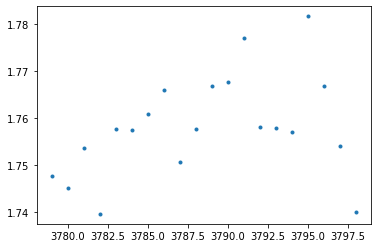

In [66]:
predicted = y_pred.plot(style='.')

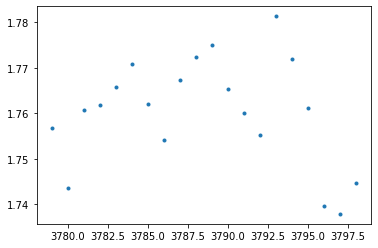

In [67]:
# chart = pd.DataFrame({y_test, y_pred})
# lines = chart.plot.line()
actual = y_test.plot(style='.')

In [26]:
# clears the model after a run so you can contrast new runs.
# predictor.unpersist_models('ag_predict_interval')
# predictor.save_space()
# predictor.delete_models(models_to_keep='best', dry_run=False)
%rm -rf AutogluonModels, ag_predict_interval
!ls

agModels-predictClose
EURUSD_Daily_197101040000_202205060000.csv
GBPAUD_Daily_200708210000_202205060000.csv
sample_data
USDJPY_Daily_197101040000_202205060000.csv
